In [90]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import h2o
from h2o.automl import H2OAutoML

In [91]:
h2o.init(ip ='localhost', port = 54321)




Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,16 hours 52 mins
H2O_cluster_timezone:,Europe/Berlin
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.2
H2O_cluster_version_age:,12 days
H2O_cluster_name:,H2O_from_python_aminp_x9rscd
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.191 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [92]:
#train_df = h2o.import_file("C:/Users/aminp/OneDrive/Dokumenter/NTNU/4år/Machinelearning/machine_learning/data/train_data/dataset_train_without_rev_features.csv")
test_df = h2o.import_file("C:/Users/aminp/OneDrive/Dokumenter/NTNU/4år/Machinelearning/machine_learning/data/train_data/dataset_test_without_rev_features.csv")

#test_train = h2o.import_file("C:/Users/aminp/OneDrive/Dokumenter/NTNU/4år/Machinelearning/machine_learning/data/train_data/test_train.csv")
#test_test = h2o.import_file("C:/Users/aminp/OneDrive/Dokumenter/NTNU/4år/Machinelearning/machine_learning/data/train_data/test_test.csv")
#rev_labels = h2o.import_file("C:/Users/aminp/OneDrive/Dokumenter/NTNU/4år/Machinelearning/machine_learning/data/train_data/revenue_labels.csv")

#train_df = h2o.import_file("C:/Users/aminp/OneDrive/Dokumenter/NTNU/4år/Machinelearning/machine_learning/data/train_data/train_data.csv")
#test_df = h2o.import_file("C:/Users/aminp/OneDrive/Dokumenter/NTNU/4år/Machinelearning/machine_learning/data/train_data/test_data.csv") 

test_dist = h2o.import_file("C:/Users/aminp/OneDrive/Dokumenter/NTNU/4år/Machinelearning/machine_learning/data/train_data/test_set_with_only_distance_feat.csv")
train_dist = h2o.import_file("C:/Users/aminp/OneDrive/Dokumenter/NTNU/4år/Machinelearning/machine_learning/data/train_data/train_set_with_only_distance_feat.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


C1,storesinradiustransformer__in_radius,clustersimilarity__Cluster 0 similarity,clustersimilarity__Cluster 1 similarity,clustersimilarity__Cluster 2 similarity,clustersimilarity__Cluster 3 similarity,clustersimilarity__Cluster 4 similarity,clustersimilarity__Cluster 5 similarity,clustersimilarity__Cluster 6 similarity,clustersimilarity__Cluster 7 similarity,clustersimilarity__Cluster 8 similarity,clustersimilarity__Cluster 9 similarity,clustersimilarity__Cluster 10 similarity,clustersimilarity__Cluster 11 similarity,clustersimilarity__Cluster 12 similarity,clustersimilarity__Cluster 13 similarity,clustersimilarity__Cluster 14 similarity,clustersimilarity__Cluster 15 similarity,clustersimilarity__Cluster 16 similarity,clustersimilarity__Cluster 17 similarity,clustersimilarity__Cluster 18 similarity,clustersimilarity__Cluster 19 similarity,closeststore__distance_lv1_desc,closeststore__distance_lv2_desc,closeststore__distance_lv3_desc,closeststore__distance_lv4_desc,remainder__number_of_all_stop_types,remainder__number_of_mangler_viktighetsnivÃƒÆ’Ã†â€™Ãƒâ€šÃ‚Â¥,remainder__number_of_standard_holdeplass,remainder__number_of_lokalt_knutepunkt,remainder__number_of_nasjonalt_knutepunkt,remainder__number_of_regionalt_knutepunkt,remainder__number_of_annen_viktig_holdeplass,remainder__distance_to_mangler_viktighetsnivÃƒÆ’Ã†â€™Ãƒâ€šÃ‚Â¥,remainder__distance_to_standard_holdeplass,remainder__distance_to_lokalt_knutepunkt,remainder__distance_to_nasjonalt_knutepunkt,remainder__distance_to_regionalt_knutepunkt,remainder__distance_to_annen_viktig_holdeplass
nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
0,5399,0.683306,4.82227e-20,8.78156e-14,7.59228e-72,1.02347e-08,2.02288e-197,0.012216,6.11543e-06,5.7148e-05,2.4578e-12,1.50182e-12,0.377311,1.75105e-122,1.11148e-43,1.39762e-52,0.998125,0.381954,1.70667e-08,2.84641e-08,1.22616e-31,0.000309021,0.000309021,0.0125749,0.0125749,1168,1054,27,64,10,13,0,0.00023121,0.0301654,0.0102815,0.0264716,0.0138859,0.159301
1,636,0.113132,2.62004e-27,3.32722e-09,2.48631e-87,4.21976e-08,5.63781e-224,0.0324282,2.09171e-08,0.0494804,2.60544e-07,8.05192e-10,0.843881,2.15816e-143,9.0048e-55,1.55023e-65,0.149852,0.00751798,1.17858e-12,2.92713e-05,5.6422e-41,0.000275592,0.000275592,0.0159886,0.0159886,380,83,287,3,0,7,0,0.0224221,0.00101368,0.0193961,0.489463,0.0192575,0.135651
2,1309,0.678537,1.82975e-19,2.00409e-14,2.07644e-70,5.79627e-09,1.00247e-194,0.00808175,7.60121e-06,2.25052e-05,5.37694e-13,5.06679e-13,0.27799,1.93939e-120,1.00269e-42,2.05564e-51,0.970573,0.44577,3.18724e-08,9.68776e-09,7.43466e-31,8.75107e-06,8.75127e-06,0.0422396,0.0422396,564,522,11,20,0,2,9,0.0036903,0.0174625,0.0126024,0.171475,0.0783459,0.024432
3,1253,4.58944e-08,2.45752e-07,2.70998e-16,5.4855e-50,0.000276319,4.97143e-177,0.00022819,0.974723,1.86427e-14,3.91705e-19,6.85265e-10,5.07373e-08,3.98205e-100,1.32599e-23,8.11809e-33,4.89441e-06,0.000942164,0.213707,2.14515e-10,6.32782e-15,0.00512888,0.00512888,0.0608901,0.0608901,651,237,395,15,0,0,4,0.00288747,0.00334835,0.0191456,0.409014,0.746042,0.0336374
4,5345,0.673142,5.56696e-20,9.06402e-14,9.36098e-72,1.11394e-08,2.42629e-197,0.01262,6.67109e-06,5.54939e-05,2.44836e-12,1.61503e-12,0.373224,2.15195e-122,1.35816e-43,1.69896e-52,0.99878,0.39053,1.8873e-08,2.94125e-08,1.45994e-31,0.00398779,0.00398779,0.0125749,0.0125749,1156,1042,27,64,10,13,0,0.000919385,0.0229259,0.00798231,0.0262471,0.0173485,0.155829
5,4608,0.723636,2.8535e-20,7.29738e-14,3.72526e-72,7.12474e-09,1.23791e-197,0.0105358,4.34758e-06,6.18723e-05,2.34972e-12,1.0754e-12,0.388642,9.18234e-123,5.41804e-44,7.0869e-53,0.992237,0.350831,1.16701e-08,2.39109e-08,6.52929e-32,0.000753435,0.000753435,0.0260949,0.0260949,1059,951,26,59,10,13,0,0.000333413,0.014301,0.0151867,0.0637972,0.0157964,0.142597
6,1529,3.90001e-08,1.75215e-07,5.08345e-16,1.91396e-50,0.000396862,4.34086e-178,0.000265126,0.987114,2.31488e-14,6.80088e-19,1.

In [95]:
rev = pd.read_csv("C:/Users/aminp/OneDrive/Dokumenter/NTNU/4år/Machinelearning/machine_learning/data/train_data/revenue_labels.csv")

In [96]:
rev_labels = rev.drop(["Unnamed: 0"], axis = 1)
rev_labels["log_revenue"] = np.log(1+rev_labels.revenue)



Text(0.5, 1.0, 'Log revenue')

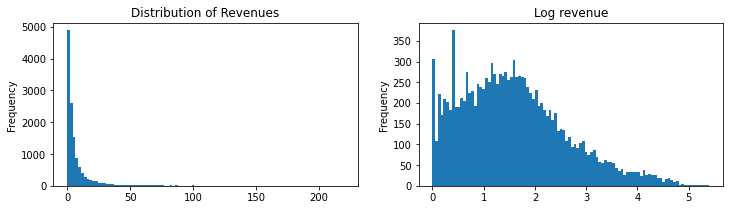

In [97]:
import matplotlib.pyplot as plt 

fig, (ax1, ax2) = plt.subplots(figsize=(12, 3), ncols=2)
rev_labels.revenue.plot.hist(bins=100, ax=ax1)
ax1.set_title('Distribution of Revenues');
rev_labels.log_revenue.plot.hist(bins=100, ax = ax2)
ax2.set_title("Log revenue")



In [98]:
rev = h2o.H2OFrame(rev_labels)



Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [107]:
test_dist

C1,storesinradiustransformer__in_radius,clustersimilarity__Cluster 0 similarity,clustersimilarity__Cluster 1 similarity,clustersimilarity__Cluster 2 similarity,clustersimilarity__Cluster 3 similarity,clustersimilarity__Cluster 4 similarity,clustersimilarity__Cluster 5 similarity,clustersimilarity__Cluster 6 similarity,clustersimilarity__Cluster 7 similarity,clustersimilarity__Cluster 8 similarity,clustersimilarity__Cluster 9 similarity,clustersimilarity__Cluster 10 similarity,clustersimilarity__Cluster 11 similarity,clustersimilarity__Cluster 12 similarity,clustersimilarity__Cluster 13 similarity,clustersimilarity__Cluster 14 similarity,clustersimilarity__Cluster 15 similarity,clustersimilarity__Cluster 16 similarity,clustersimilarity__Cluster 17 similarity,clustersimilarity__Cluster 18 similarity,clustersimilarity__Cluster 19 similarity,closeststore__distance_lv1_desc,closeststore__distance_lv2_desc,closeststore__distance_lv3_desc,closeststore__distance_lv4_desc,remainder__number_of_all_stop_types,remainder__number_of_mangler_viktighetsnivÃƒÆ’Ã†â€™Ãƒâ€šÃ‚Â¥,remainder__number_of_standard_holdeplass,remainder__number_of_lokalt_knutepunkt,remainder__number_of_nasjonalt_knutepunkt,remainder__number_of_regionalt_knutepunkt,remainder__number_of_annen_viktig_holdeplass,remainder__distance_to_mangler_viktighetsnivÃƒÆ’Ã†â€™Ãƒâ€šÃ‚Â¥,remainder__distance_to_standard_holdeplass,remainder__distance_to_lokalt_knutepunkt,remainder__distance_to_nasjonalt_knutepunkt,remainder__distance_to_regionalt_knutepunkt,remainder__distance_to_annen_viktig_holdeplass
nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
0,5399,0.683306,4.82227e-20,8.78156e-14,7.59228e-72,1.02347e-08,2.02288e-197,0.012216,6.11543e-06,5.7148e-05,2.4578e-12,1.50182e-12,0.377311,1.75105e-122,1.11148e-43,1.39762e-52,0.998125,0.381954,1.70667e-08,2.84641e-08,1.22616e-31,0.000309021,0.000309021,0.0125749,0.0125749,1168,1054,27,64,10,13,0,0.00023121,0.0301654,0.0102815,0.0264716,0.0138859,0.159301
1,636,0.113132,2.62004e-27,3.32722e-09,2.48631e-87,4.21976e-08,5.63781e-224,0.0324282,2.09171e-08,0.0494804,2.60544e-07,8.05192e-10,0.843881,2.15816e-143,9.0048e-55,1.55023e-65,0.149852,0.00751798,1.17858e-12,2.92713e-05,5.6422e-41,0.000275592,0.000275592,0.0159886,0.0159886,380,83,287,3,0,7,0,0.0224221,0.00101368,0.0193961,0.489463,0.0192575,0.135651
2,1309,0.678537,1.82975e-19,2.00409e-14,2.07644e-70,5.79627e-09,1.00247e-194,0.00808175,7.60121e-06,2.25052e-05,5.37694e-13,5.06679e-13,0.27799,1.93939e-120,1.00269e-42,2.05564e-51,0.970573,0.44577,3.18724e-08,9.68776e-09,7.43466e-31,8.75107e-06,8.75127e-06,0.0422396,0.0422396,564,522,11,20,0,2,9,0.0036903,0.0174625,0.0126024,0.171475,0.0783459,0.024432
3,1253,4.58944e-08,2.45752e-07,2.70998e-16,5.4855e-50,0.000276319,4.97143e-177,0.00022819,0.974723,1.86427e-14,3.91705e-19,6.85265e-10,5.07373e-08,3.98205e-100,1.32599e-23,8.11809e-33,4.89441e-06,0.000942164,0.213707,2.14515e-10,6.32782e-15,0.00512888,0.00512888,0.0608901,0.0608901,651,237,395,15,0,0,4,0.00288747,0.00334835,0.0191456,0.409014,0.746042,0.0336374
4,5345,0.673142,5.56696e-20,9.06402e-14,9.36098e-72,1.11394e-08,2.42629e-197,0.01262,6.67109e-06,5.54939e-05,2.44836e-12,1.61503e-12,0.373224,2.15195e-122,1.35816e-43,1.69896e-52,0.99878,0.39053,1.8873e-08,2.94125e-08,1.45994e-31,0.00398779,0.00398779,0.0125749,0.0125749,1156,1042,27,64,10,13,0,0.000919385,0.0229259,0.00798231,0.0262471,0.0173485,0.155829
5,4608,0.723636,2.8535e-20,7.29738e-14,3.72526e-72,7.12474e-09,1.23791e-197,0.0105358,4.34758e-06,6.18723e-05,2.34972e-12,1.0754e-12,0.388642,9.18234e-123,5.41804e-44,7.0869e-53,0.992237,0.350831,1.16701e-08,2.39109e-08,6.52929e-32,0.000753435,0.000753435,0.0260949,0.0260949,1059,951,26,59,10,13,0,0.000333413,0.014301,0.0151867,0.0637972,0.0157964,0.142597
6,1529,3.90001e-08,1.75215e-07,5.08345e-16,1.91396e-50,0.000396862,4.34086e-178,0.000265126,0.987114,2.31488e-14,6.80088e-19,1.

In [115]:
#x_train = test_train.drop([0], axis = 0)

rev2 = rev[:, 0]


df = train_dist.drop("C1", axis = 1)
df2 = df.drop([0], axis = 0)

x_train = df2.cbind(rev2)


list_df = ["mall__is", "geo__Cluster 4 similarity", "geo__Cluster 6 similarity",
 "geo__Cluster 7 similarity","geo__Cluster 0 similarity", "geo__Cluster 1 similarity", 
 "geo__Cluster 2 similarity", "geo__Cluster 3 similarity", "geo__Cluster 5 similarity", "geo__Cluster 8 similarity"]


stores_id = test_df[:, 1]

stores_id2 = stores_id.drop([0], axis = 0)


y_test1 = test_dist.drop("C1", axis = 1 )
y_test2 = y_test1.drop([0], axis = 0)

y_test = y_test2.cbind(stores_id2)
y_test

storesinradiustransformer__in_radius,clustersimilarity__Cluster 0 similarity,clustersimilarity__Cluster 1 similarity,clustersimilarity__Cluster 2 similarity,clustersimilarity__Cluster 3 similarity,clustersimilarity__Cluster 4 similarity,clustersimilarity__Cluster 5 similarity,clustersimilarity__Cluster 6 similarity,clustersimilarity__Cluster 7 similarity,clustersimilarity__Cluster 8 similarity,clustersimilarity__Cluster 9 similarity,clustersimilarity__Cluster 10 similarity,clustersimilarity__Cluster 11 similarity,clustersimilarity__Cluster 12 similarity,clustersimilarity__Cluster 13 similarity,clustersimilarity__Cluster 14 similarity,clustersimilarity__Cluster 15 similarity,clustersimilarity__Cluster 16 similarity,clustersimilarity__Cluster 17 similarity,clustersimilarity__Cluster 18 similarity,clustersimilarity__Cluster 19 similarity,closeststore__distance_lv1_desc,closeststore__distance_lv2_desc,closeststore__distance_lv3_desc,closeststore__distance_lv4_desc,remainder__number_of_all_stop_types,remainder__number_of_mangler_viktighetsnivÃƒÆ’Ã†â€™Ãƒâ€šÃ‚Â¥,remainder__number_of_standard_holdeplass,remainder__number_of_lokalt_knutepunkt,remainder__number_of_nasjonalt_knutepunkt,remainder__number_of_regionalt_knutepunkt,remainder__number_of_annen_viktig_holdeplass,remainder__distance_to_mangler_viktighetsnivÃƒÆ’Ã†â€™Ãƒâ€šÃ‚Â¥,remainder__distance_to_standard_holdeplass,remainder__distance_to_lokalt_knutepunkt,remainder__distance_to_nasjonalt_knutepunkt,remainder__distance_to_regionalt_knutepunkt,remainder__distance_to_annen_viktig_holdeplass,store_id
5399,0.683306,4.82227e-20,8.78156e-14,7.59228e-72,1.02347e-08,2.02288e-197,0.012216,6.11543e-06,5.7148e-05,2.4578e-12,1.50182e-12,0.377311,1.75105e-122,1.11148e-43,1.39762e-52,0.998125,0.381954,1.70667e-08,2.84641e-08,1.22616e-31,0.000309021,0.000309021,0.0125749,0.0125749,1168,1054,27,64,10,13,0,0.00023121,0.0301654,0.0102815,0.0264716,0.0138859,0.159301,914206820-914239427-717245
636,0.113132,2.62004e-27,3.32722e-09,2.48631e-87,4.21976e-08,5.63781e-224,0.0324282,2.09171e-08,0.0494804,2.60544e-07,8.05192e-10,0.843881,2.15816e-143,9.0048e-55,1.55023e-65,0.149852,0.00751798,1.17858e-12,2.92713e-05,5.6422e-41,0.000275592,0.000275592,0.0159886,0.0159886,380,83,287,3,0,7,0,0.0224221,0.00101368,0.0193961,0.489463,0.0192575,0.135651,916789157-916823770-824309
1309,0.678537,1.82975e-19,2.00409e-14,2.07644e-70,5.79627e-09,1.00247e-194,0.00808175,7.60121e-06,2.25052e-05,5.37694e-13,5.06679e-13,0.27799,1.93939e-120,1.00269e-42,2.05564e-51,0.970573,0.44577,3.18724e-08,9.68776e-09,7.43466e-31,8.75107e-06,8.75127e-06,0.0422396,0.0422396,564,522,11,20,0,2,9,0.0036903,0.0174625,0.0126024,0.171475,0.0783459,0.024432,913341082-977479363-2948
1253,4.58944e-08,2.45752e-07,2.70998e-16,5.4855e-50,0.000276319,4.97143e-177,0.00022819,0.974723,1.86427e-14,3.91705e-19,6.85265e-10,5.07373e-08,3.98205e-100,1.32599e-23,8.11809e-33,4.89441e-06,0.000942164,0.213707,2.14515e-10,6.32782e-15,0.00512888,0.00512888,0.0608901,0.0608901,651,237,395,15,0,0,4,0.00288747,0.00334835,0.0191456,0.409014,0.746042,0.0336374,889682582-889697172-28720
5345,0.673142,5.56696e-20,9.06402e-14,9.36098e-72,1.11394e-08,2.42629e-197,0.01262,6.67109e-06,5.54939e-05,2.44836e-12,1.61503e-12,0.373224,2.15195e-122,1.35816e-43,1.69896e-52,0.99878,0.39053,1.8873e-08,2.94125e-08,1.45994e-31,0.00398779,0.00398779,0.0125749,0.0125749,1156,1042,27,64,10,13,0,0.000919385,0.0229259,0.00798231,0.0262471,0.0173485,0.155829,997991699-998006945-417222
4608,0.723636,2.8535e-20,7.29738e-14,3.72526e-72,7.12474e-09,1.23791e-197,0.0105358,4.34758e-06,6.18723e-05,2.34972e-12,1.0754e-12,0.388642,9.18234e-123,5.41804e-44,7.0869e-53,0.992237,0.350831,1.16701e-08,2.39109e-08,6.52929e-32,0.000753435,0.000753435,0.0260949,0.0260949,1059,951,26,59,10,13,0,0.000333413,0.014301,0.0151867,0.0637972,0.0157964,0.142597,914931487-815162862-756427
1529,3.90001e-08,1.75215e-07,5.08345e-16,1.91396e-50,0.000396862,4.34086e-178,0.000265126,0.987114,2.31488e-14,6.80088e-19,1.20407

In [126]:
x_train.hist(bins = 15, figsize = (15,6))

H2OValueError: Unknown parameters to hist(): {'bins': 15, 'figsize': (15, 6)}

In [116]:
x_train.describe()

Rows:12859
Cols:39

,storesinradiustransformer__in_radius,clustersimilarity__Cluster 0 similarity,clustersimilarity__Cluster 1 similarity,clustersimilarity__Cluster 2 similarity,clustersimilarity__Cluster 3 similarity,clustersimilarity__Cluster 4 similarity,clustersimilarity__Cluster 5 similarity,clustersimilarity__Cluster 6 similarity,clustersimilarity__Cluster 7 similarity,clustersimilarity__Cluster 8 similarity,clustersimilarity__Cluster 9 similarity,clustersimilarity__Cluster 10 similarity,clustersimilarity__Cluster 11 similarity,clustersimilarity__Cluster 12 similarity,clustersimilarity__Cluster 13 similarity,clustersimilarity__Cluster 14 similarity,clustersimilarity__Cluster 15 similarity,clustersimilarity__Cluster 16 similarity,clustersimilarity__Cluster 17 similarity,clustersimilarity__Cluster 18 similarity,clustersimilarity__Cluster 19 similarity,closeststore__distance_lv1_desc,closeststore__distance_lv2_desc,closeststore__distance_lv3_desc,closeststore__distance_lv4_desc,remainder__number_of_all_stop_types,remainder__number_of_mangler_viktighetsnivÃƒÆ’Ã†â€™Ãƒâ€šÃ‚Â¥,remainder__number_of_standard_holdeplass,remainder__number_of_lokalt_knutepunkt,remainder__number_of_nasjonalt_knutepunkt,remainder__number_of_regionalt_knutepunkt,remainder__number_of_annen_viktig_holdeplass,remainder__distance_to_mangler_viktighetsnivÃƒÆ’Ã†â€™Ãƒâ€šÃ‚Â¥,remainder__distance_to_standard_holdeplass,remainder__distance_to_lokalt_knutepunkt,remainder__distance_to_nasjonalt_knutepunkt,remainder__distance_to_regionalt_knutepunkt,remainder__distance_to_annen_viktig_holdeplass,revenue
type,int,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,int,int,int,int,int,int,int,real,real,real,real,real,real,real
mins,0.0,3.109622756845493e-228,2.251218749212348e-146,0.0,2.921216006688298e-132,2.194008223450957e-264,0.0,1.5469357836879774e-252,5.1160071223360456e-210,0.0,0.0,0.0,1.1525024558440659e-247,2.1398281687473123e-206,1.3572267009638662e-108,1.9264775378918656e-103,3.998274963524455e-228,8.56591516713741e-215,8.413188476853861e-185,0.0,1.025870924756634e-124,4.100614250572248e-11,4.1124208190132345e-11,4.1124208190132345e-11,4.1124208190132345e-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.532953091389676e-05,0.0001385911039618,0.0001424064366916,0.0001414601598365,8.51192219671041e-05,0.0001501584724423,0.0
mean,1069.8980480597247,0.24132041704777096,0.011527785267649117,0.0973154505509534,0.016861623266426536,0.024722251906361327,0.004291364979031769,0.026180743480812077,0.056017010951217874,0.04897519544312284,0.09133210687967272,0.04145018568547069,0.20894503551449597,0.005882578562753744,0.012085473676027225,0.014366282915858326,0.3232093630119912,0.1415444376807395,0.027410691918365773,0.030733050057328928,0.019158008941872768,0.009744621482940356,0.026987166078380007,0.07991608881610557,0.08770656181412441,419.5209580838323,336.6983435725951,56.74422583404618,16.64608445446769,2.5739948674080417,4.871996267205847,1.9863130881094961,0.005611965073143359,0.06104580013823192,0.05444826919781581,0.2466374972469288,0.16464638917947977,0.8636655897448071,8.220683101329808
maxs,5496.0,0.9998745178714216,0.9413439777447444,0.9997010547399612,0.9967939461854736,0.9980491716849782,0.9403266659232048,0.997818647237539,0.9998083463885632,0.9916008122822876,0.9999901127919136,0.9989239694021066,0.9974318710375722,0.93108507171708,0.9999184883562134,0.9958223162856412,0.9999986470525132,0.9997362167761016,0.9967363592294743,0.9920545411298316,0.957122100429424,1.2149787209979197,1.6943705788049048,12.179958473050242,12.179958473050242,1186.0,1104.0,601.0,76.0,21.0,36.0,24.0,0.4939073589317806,1.0569651326119416,1.1830839446311443,2.070690562197816,5.124139578947495,9.505990411832457,219.599
sigma,1631.5544403081678,0.3180581832541044,0.08305035420060021,0.2621992694775512,0.11916583997514017,0.1257040718802181,0.05622391451624586,0.10092314897929454,0.2109783374607799,0.18615962966044258,0.2529081064504098,0.163238305

In [119]:
x = x_train.columns
y = 'revenue'
x.remove(y)

aml = H2OAutoML(max_models=5, seed=1)
aml.train(x=x, y=y, training_frame= x_train) 

AutoML progress: |██
16:56:03.134: AutoML: XGBoost is not available; skipping it.

█████████████████████████████████████████████████████████████| (done) 100%


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,8.189248,0.179522,8.352072,7.9480357,8.325992,8.269196,8.050947
mean_residual_deviance,229.18565,24.288475,249.53302,211.43613,251.52673,236.97157,196.46082
mse,229.18565,24.288475,249.53302,211.43613,251.52673,236.97157,196.46082
null_deviance,608161.3,76780.42,668847.06,560902.75,677428.5,635544.25,498083.9
r2,0.0286759,0.0066695,0.0211959,0.0247120,0.0265342,0.0376361,0.0333010
residual_deviance,590611.44,76015.57,654275.56,546773.8,659251.56,611623.6,481132.56
rmse,15.121476,0.8113346,15.796614,14.540843,15.859594,15.393881,14.016448
rmsle,1.1795686,0.0068749,1.1753082,1.1746912,1.1737242,1.1864575,1.187662


In [120]:

lb = h2o.automl.get_leaderboard(aml, extra_columns = "ALL")
best_model = aml.get_best_model()

lb

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,algo
StackedEnsemble_AllModels_1_AutoML_10_20221108_165603,15.1546,229.663,8.19345,1.17925,229.663,StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_10_20221108_165603,15.1653,229.987,8.1936,1.18028,229.987,StackedEnsemble
GBM_1_AutoML_10_20221108_165603,15.1664,230.02,8.19946,1.1788,230.02,GBM
GBM_2_AutoML_10_20221108_165603,15.1807,230.455,8.22385,1.1819,230.455,GBM
GBM_3_AutoML_10_20221108_165603,15.2218,231.703,8.2435,1.18209,231.703,GBM
GLM_1_AutoML_10_20221108_165603,15.3501,235.626,8.33299,nan,235.626,GLM
DRF_1_AutoML_10_20221108_165603,15.6813,245.903,8.61273,1.20429,245.903,DRF


In [121]:
m = h2o.get_model(lb[2,"model_id"])
m.varimp(use_pandas=True)




,variable,relative_importance,scaled_importance,percentage
0,closeststore__distance_lv4_desc,257052.625000,1.000000,0.141288
1,closeststore__distance_lv1_desc,247662.171875,0.963469,0.136126
2,closeststore__distance_lv2_desc,186348.625000,0.724943,0.102426
3,storesinradiustransformer__in_radius,102214.234375,0.397639,0.056182
4,remainder__distance_to_nasjonalt_knutepunkt,89025.718750,0.346333,0.048933
5,remainder__number_of_all_stop_types,79134.898438,0.307855,0.043496
6,closeststore__distance_lv3_desc,74852.812500,0.291196,0.041143
7,clustersimilarity__Cluster 11 similarity,68338.421875,0.265854,0.037562
8,remainder__distance_to_mangler_viktighetsnivÃƒ...,63882.832031,0.248520,0.035113
9,remainder__number_of_lokalt_knutepunkt,63822.488281,0.248286,0.035080


In [122]:
#model = h2o.get_model(lb[2,"model_id"])
prediction = aml.leader.predict(y_test)
df = y_test.cbind(prediction)
df = df.as_data_frame(use_pandas=True)
result = df.loc[:,("store_id", 'predict')]
submission = result.rename(columns = {"store_id": "id", "predict": "predicted"})
submission.to_csv("Only_dist_features.csv", index = False)

submission






stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


,id,predicted
0,914206820-914239427-717245,5.833190
1,916789157-916823770-824309,13.478902
2,913341082-977479363-2948,6.782519
3,889682582-889697172-28720,7.331552
4,997991699-998006945-417222,7.075824
...,...,...
8572,917323003-917383529-844309,4.503257
8573,917353379-917411824-845904,5.973677
8574,917072302-917089248-833647,5.672444
8575,916960557-916993161-829908,7.557301


In [67]:
submission["predicted"] = np.exp(submission["predict"]) - 1

submit = submission.drop("predict", axis = 1)
submit.to_csv("Reveneue_transformed2.csv", index = False)
submit                               

,id,predicted
0,914206820-914239427-717245,4.525447
1,916789157-916823770-824309,6.958635
2,913341082-977479363-2948,2.771788
3,889682582-889697172-28720,6.172633
4,997991699-998006945-417222,23.481902
...,...,...
8572,917323003-917383529-844309,10.177816
8573,917353379-917411824-845904,4.248085
8574,917072302-917089248-833647,27.223487
8575,916960557-916993161-829908,24.693607


In [68]:
best_of = pd.read_csv("C:/Users/aminp/OneDrive/Dokumenter/NTNU/4år/Machinelearning/machine_learning/notebooks/Arash/StackedEnsembleBestOfFamily.csv")
best_of

,id,predicted
0,914206820-914239427-717245,4.456851
1,916789157-916823770-824309,4.610909
2,913341082-977479363-2948,2.558722
3,889682582-889697172-28720,4.062493
4,997991699-998006945-417222,25.578228
...,...,...
8572,917323003-917383529-844309,8.825647
8573,917353379-917411824-845904,2.923221
8574,917072302-917089248-833647,33.390177
8575,916960557-916993161-829908,27.035976


array([[<AxesSubplot:title={'center':'storesinradiustransformer__in_radius'}>,
        <AxesSubplot:title={'center':'clustersimilarity__Cluster 0 similarity'}>,
        <AxesSubplot:title={'center':'clustersimilarity__Cluster 1 similarity'}>,
        <AxesSubplot:title={'center':'clustersimilarity__Cluster 2 similarity'}>,
        <AxesSubplot:title={'center':'clustersimilarity__Cluster 3 similarity'}>,
        <AxesSubplot:title={'center':'clustersimilarity__Cluster 4 similarity'}>],
       [<AxesSubplot:title={'center':'clustersimilarity__Cluster 5 similarity'}>,
        <AxesSubplot:title={'center':'clustersimilarity__Cluster 6 similarity'}>,
        <AxesSubplot:title={'center':'clustersimilarity__Cluster 7 similarity'}>,
        <AxesSubplot:title={'center':'clustersimilarity__Cluster 8 similarity'}>,
        <AxesSubplot:title={'center':'clustersimilarity__Cluster 9 similarity'}>,
        <AxesSubplot:title={'center':'clustersimilarity__Cluster 10 similarity'}>],
       [<AxesSub

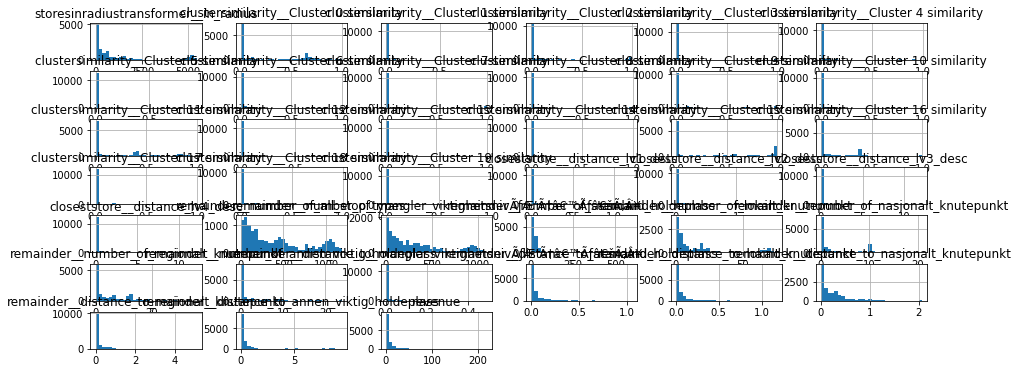

In [132]:
df_x = x_train.as_data_frame(use_pandas=True)
df_x.hist(bins=30, figsize = (15,6))